# Importando os pacotes

In [257]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Importando os dados

In [258]:
df = pd.read_csv('notebook_cb.csv', sep=';')

In [259]:
df

,Notebooks,preco,parcelas,valor_parcelas
0,Notebook Gamer Acer NVIDIA GeForce GTX 1650 Co...,"5.599,00",10,"559,90"
1,Notebook Gamer Asus NVIDIA GeForce GTX 1050 AM...,"5.199,00",10,"519,90"
2,Notebook Dell Core i7-8565U 8GB 2TB Tela 15.6”...,"4.699,00",10,"469,90"
3,Notebook VAIO Core i7-10510U 8GB 1TB Tela 15.6...,"4.999,00",10,"499,90"
4,Notebook Asus Core i7-10510U 8GB 1TB Placa de ...,"5.099,00",10,"509,90"
...,...,...,...,...
535,Notebook Lenovo Ideapad Core I3-10110u 8gb 1tb...,"5.599,00",10,"559,90"
536,"Notebook Asus VivoBook 15, Intel Core i7 10510...","6.690,20",10,"669,02"
537,"Notebook Lenovo Ideapad S145 - Tela 15.6, Inte...",0,0,0
538,"Notebook Lenovo Ideapad S145 - Tela 15.6, Inte...","4.422,38",10,"442,24"


# Selecionando os primeiros 500 resultados

In [260]:
df = df.iloc[0:500] 

In [261]:
df

,Notebooks,preco,parcelas,valor_parcelas
0,Notebook Gamer Acer NVIDIA GeForce GTX 1650 Co...,"5.599,00",10,"559,90"
1,Notebook Gamer Asus NVIDIA GeForce GTX 1050 AM...,"5.199,00",10,"519,90"
2,Notebook Dell Core i7-8565U 8GB 2TB Tela 15.6”...,"4.699,00",10,"469,90"
3,Notebook VAIO Core i7-10510U 8GB 1TB Tela 15.6...,"4.999,00",10,"499,90"
4,Notebook Asus Core i7-10510U 8GB 1TB Placa de ...,"5.099,00",10,"509,90"
...,...,...,...,...
495,Notebook Dell Inspiron 3501-M60P 15.6&quot; HD...,"5.499,00",10,"549,90"
496,Kit Notebook Dell Inspiron 3501-M60PF 15.6&quo...,"5.739,00",10,"573,90"
497,Notebook Dell Inspiron 3501-U60P 15.6&quot; HD...,"5.349,00",10,"534,90"
498,Kit Notebook Dell Inspiron 3501-M60SB 15.6&quo...,"5.639,00",10,"563,90"


# Organizando pelo preço

In [262]:
df = df.sort_values(by='preco', ascending=False)  

In [263]:
df['preco'] = df['preco'].str.replace('.','')
df['preco'] = df['preco'].str.replace(',','.')

df['valor_parcelas'] = df['valor_parcelas'].str.replace('.','')
df['valor_parcelas'] = df['valor_parcelas'].str.replace(',','.')

In [264]:
df

,Notebooks,preco,parcelas,valor_parcelas
37,Notebook Touch Lenovo Yoga C940 i7-1065G 8GB 2...,9999.00,10,999.90
375,Notebook Gamer Dell G15-i1100-M50PB 15.6&quot;...,9979.00,10,997.90
103,Notebook Dell Xps 9300 I7 10 Gen 16gb 1tb Ssd ...,9940.00,10,994.00
76,NOTEBOOK DELL XPS 9300 I7 10th Geração 16gb 1t...,9940.00,10,994.00
221,Notebook Acer Aspire 5 AN515-54-528V Intel Cor...,9899.99,10,990.00
...,...,...,...,...
224,"Notebook Dell i15-3501 - Tela 15.6, Intel i5 1...",0,0,0
79,"Notebook Lenovo Ideapad S145 - Tela 15.6 HD, I...",0,0,0
218,Notebook Acer Aspire 3 A315-23-R291 Ryzen 5 8G...,0,0,0
205,"Notebook Dell Inspiron 3501 - Intel i3 1005G1,...",0,0,0


# Convertendo a coluna preço para o tipo float

In [265]:

df['preco'] = df['preco'].astype(float, errors = 'raise')
df['valor_parcelas'] = df['valor_parcelas'].astype(float, errors = 'raise')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 37 to 229
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Notebooks       500 non-null    object 
 1   preco           500 non-null    float64
 2   parcelas        500 non-null    int64  
 3   valor_parcelas  500 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.5+ KB


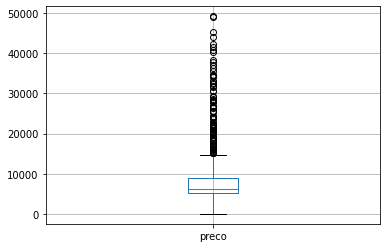

In [267]:
df2 = df.boxplot('preco')

# Tratamento estatístico

In [268]:
	
df['preco'].describe()

count      500.000000
mean      9717.356880
std       8651.071885
min          0.000000
25%       5199.000000
50%       6199.000000
75%       8999.805000
max      49200.000000
Name: preco, dtype: float64

In [269]:
preco = df['preco']

## Primeiro e terceiro quartil

In [270]:
q1 = preco.quantile(.25)
q3 = preco.quantile(.75)

## Intervalo interquatile

In [271]:
iiq = q3 - q1

## Limites

In [272]:
lim_inf = q1 - 1.5 * iiq
lim_sup = q3 + 1.5 * iiq

### Selecionando dados no intervalo

In [273]:
selecao = (preco >= lim_inf) & (preco <= lim_sup)

df_new = df[selecao]

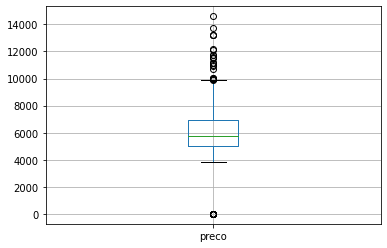

In [274]:
df_new.boxplot(['preco'])

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d63100050>]],
      dtype=object)

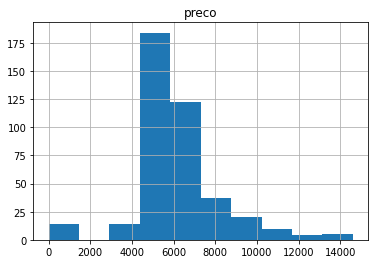

In [275]:
df_new.hist(['preco'])

## Contagem de notebooks com valor 0 (indiponível)

---



In [276]:
selecao = df['preco'] == 0 
preco0 = df[selecao].shape[0]

In [277]:
preco0 # Notebooks com o preço 0

14

# Tratameno estatístico (desprezando os notebooks indisponíveis)

In [278]:
df2 = df.loc[df['preco'] != 0]

In [279]:
df2.describe()

,preco,parcelas,valor_parcelas
count,486.000000,486.0,486.000000
mean,9997.280741,10.0,999.728025
std,8613.777182,0.0,861.377666
min,3864.230000,10.0,386.420000
25%,5301.900000,10.0,530.190000
50%,6299.000000,10.0,629.900000
75%,9465.752500,10.0,946.575000
max,49200.000000,10.0,4920.000000


In [280]:
preco2 = df2['preco']

## Primeiro e terceiro quartil

In [281]:
q1_2 = preco2.quantile(.25)
q3_2 = preco2.quantile(.75)

## Intervalo interquatile

In [282]:
iiq2 = q3_2 - q1_2

## Limites

In [283]:
lim_inf2 = q1_2 - 1.5 * iiq2
lim_sup2 = q3_2 + 1.5 * iiq2

## Selecionando dados do intervalo

In [284]:
selecao2 = (preco2 >= lim_inf) & (preco2 <= lim_sup)

df2_new = df2[selecao2]

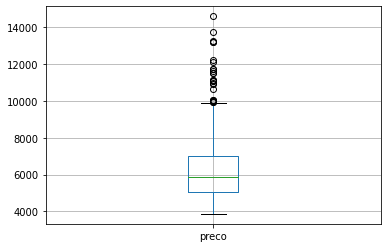

In [288]:
df2_new.boxplot(['preco'])

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d62f5a490>]],
      dtype=object)

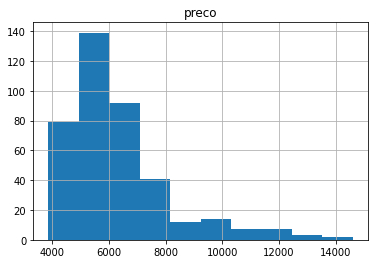

In [289]:
df2_new.hist(['preco'])